<a href="https://colab.research.google.com/github/s34836/WUM/blob/main/Lab_04_Multilayer_networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Networks

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

mlb = MultiLabelBinarizer()
mlb.fit(train_data + test_data)
X_train_full = mlb.transform(train_data)
y_train_full = train_labels
X_test = mlb.transform(test_data)
y_test = test_labels

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.33, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(X_train, y_train)
knn.score(X_valid, y_valid)

0.6416969696969697

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=X_train[0].shape),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │         159,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 160,273 (626.07 KB)

 Trainable params: 160,273 (626.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), batch_size=32, epochs=15)

Epoch 1/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8033 - loss: 0.4236 - val_accuracy: 0.8102 - val_loss: 0.4399
Epoch 2/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8867 - loss: 0.2755 - val_accuracy: 0.8753 - val_loss: 0.2970
Epoch 3/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9042 - loss: 0.2316 - val_accuracy: 0.8722 - val_loss: 0.3079
Epoch 4/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9215 - loss: 0.1955 - val_accuracy: 0.8755 - val_loss: 0.2998
Epoch 5/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9343 - loss: 0.1646 - val_accuracy: 0.8668 - val_loss: 0.3434
Epoch 6/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9409 - loss: 0.1480 - val_accuracy: 0.8695 - val_loss: 0.3310
Epoch 7/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9527 - loss: 0.1220 - val_accuracy: 0.8601 - val_loss: 0.4207
Epoch 8/15
524/524 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9593 - loss: 0.1058 - val_accuracy: 0.

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


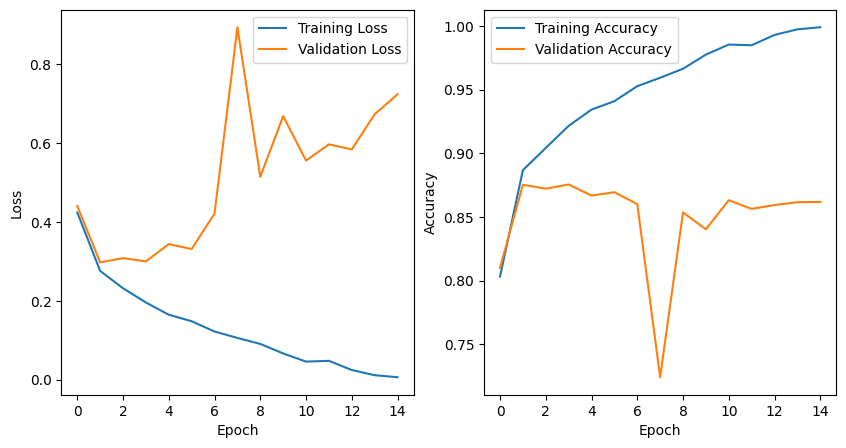

In [ ]:
import matplotlib.pyplot as plt

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(10, 5))

loss = history.history["loss"]
val_loss = history.history["val_loss"]
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
print(history.history.keys())
epoch = range(len(loss))

ax1.plot(epoch, loss, label="Training Loss")
ax1.plot(epoch, val_loss, label="Validation Loss")
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epoch, accuracy, label="Training Accuracy")
ax2.plot(epoch, val_accuracy, label="Validation Accuracy")
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Accuracy")
ax2.legend()

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.05),
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.fit(X_train_full, y_train_full, batch_size=32, epochs=5)

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8210 - loss: 0.3999
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8898 - loss: 0.2676
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9061 - loss: 0.2298
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9177 - loss: 0.2017
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9281 - loss: 0.1810


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8652 - loss: 0.3442


In [ ]:
from IPython.display import Markdown
Markdown(f"## Test loss: {test_loss:.2f} \n ## Test accuracy: {test_accuracy:.2f}")

## Test loss: 0.34 
 ## Test accuracy: 0.87

## Tasks

1. [TensorFlow Playground](https://playground.tensorflow.org) is a neural network simulator and visualization tool. Create a few networks with different architectures and check how they will be affected by different hyperparameters.
2. Create a network to classify the MNIST dataset.
    - Test a few different network topologies (different numbers and sizes of hidden layers) and hyperparameters, such as hidden layer activation functions (`sigmoid`, `tanh`, `relu`, ...).
    - The size of the output layer should correspond to the number of classes (10). The output layer should use the `softmax` activation function.
    - Use `loss="sparse_categorical_crossentropy"`.

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=1)

X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.